In [2]:
import pandas as pd

# Path to your .dat file
file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project4/Dip-steeredMedianFiltered_Seismic.dat'

# Attempt to read the first few lines of the file to inspect its structure
try:
    with open(file_path, 'r') as file:
        for i in range(10):
            line = file.readline()
            print(line.strip())
except Exception as e:
    print(f"Error reading file: {e}")

# Displaying the first few lines should help us understand the data format.


40	4	1705
8	-1	538176.00801944732666	5100876.076008975505829	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0

In [8]:
import os
import pandas as pd
import chardet

def list_cbvs_files(directory):
    files = [f for f in os.listdir(directory) if f.endswith('.cbvs')]
    if not files:
        print("No CBVS files found in the directory.")
    else:
        print(f"Found {len(files)} CBVS files.")
    return files

def detect_file_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    print(f"Detected encoding for {file_path}: {result['encoding']}")
    return result['encoding']

def read_cbvs_file(file_path, encoding=None):
    try:
        if encoding:
            df = pd.read_csv(file_path, encoding=encoding)
        else:
            df = pd.read_csv(file_path)
        return df
    except Exception as e:
        print(f"Error reading {file_path} with encoding {encoding}: {e}")
        return None

def load_cbvs_files(directory):
    data_frames = []
    cbvs_files = list_cbvs_files(directory)
    for file in cbvs_files:
        file_path = os.path.join(directory, file)
        encoding = detect_file_encoding(file_path)
        df = read_cbvs_file(file_path, encoding)
        if df is None and encoding is None:
            for enc in ['latin1', 'ISO-8859-1', 'cp1252']:
                df = read_cbvs_file(file_path, enc)
                if df is not None:
                    break
        if df is not None:
            data_frames.append(df)
    return pd.concat(data_frames, ignore_index=True) if data_frames else None

# Directory containing CBVS files
directory = 'D:/Computer Aplication/WorkPlacement/Projects/Project4/NRCAN_Laurentian_Basin/Seismics/Dip-steeredMedianFiltered_Seismic'

# Load data from the provided folders
data = load_cbvs_files(directory)

if data is not None:
    print(data.head())
else:
    print("No data could be read from the CBVS files.")


Found 30 CBVS files.
Detected encoding for D:/Computer Aplication/WorkPlacement/Projects/Project4/NRCAN_Laurentian_Basin/Seismics/Dip-steeredMedianFiltered_Seismic\Dip-steeredMedianFiltered_Seismic^10.cbvs: None
Error reading D:/Computer Aplication/WorkPlacement/Projects/Project4/NRCAN_Laurentian_Basin/Seismics/Dip-steeredMedianFiltered_Seismic\Dip-steeredMedianFiltered_Seismic^10.cbvs with encoding None: 'utf-8' codec can't decode byte 0x9c in position 8: invalid start byte
Error reading D:/Computer Aplication/WorkPlacement/Projects/Project4/NRCAN_Laurentian_Basin/Seismics/Dip-steeredMedianFiltered_Seismic\Dip-steeredMedianFiltered_Seismic^10.cbvs with encoding latin1: Error tokenizing data. C error: Expected 1 fields in line 26, saw 2

Error reading D:/Computer Aplication/WorkPlacement/Projects/Project4/NRCAN_Laurentian_Basin/Seismics/Dip-steeredMedianFiltered_Seismic\Dip-steeredMedianFiltered_Seismic^10.cbvs with encoding ISO-8859-1: Error tokenizing data. C error: Expected 1 fields

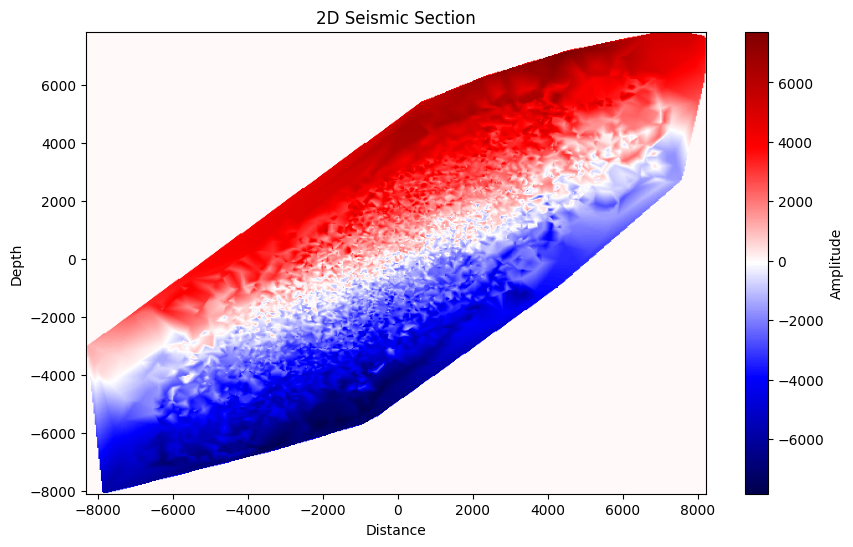

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Load the data
file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project4/NRCAN_Laurentian_Basin/Export/Dip-steeredMedianFiltered_Seismic/output.csv'
df = pd.read_csv(file_path)

# Rename columns for convenience
df.columns = ['Distance', 'Depth', 'Amplitude']

# Define the grid size
grid_x, grid_y = np.mgrid[df['Distance'].min():df['Distance'].max():500j,
                          df['Depth'].min():df['Depth'].max():500j]

# Interpolate the amplitude data
grid_z = griddata((df['Distance'], df['Depth']), df['Amplitude'], (grid_x, grid_y), method='linear')

# Handle NaNs if necessary (e.g., replace them with zeros or perform further interpolation)
grid_z = np.nan_to_num(grid_z)

plt.figure(figsize=(10, 6))
plt.imshow(grid_z.T, extent=(df['Distance'].min(), df['Distance'].max(), df['Depth'].min(), df['Depth'].max()),
           origin='lower', cmap='seismic', aspect='auto')
plt.colorbar(label='Amplitude')
plt.title('2D Seismic Section')
plt.xlabel('Distance')
plt.ylabel('Depth')
plt.show()



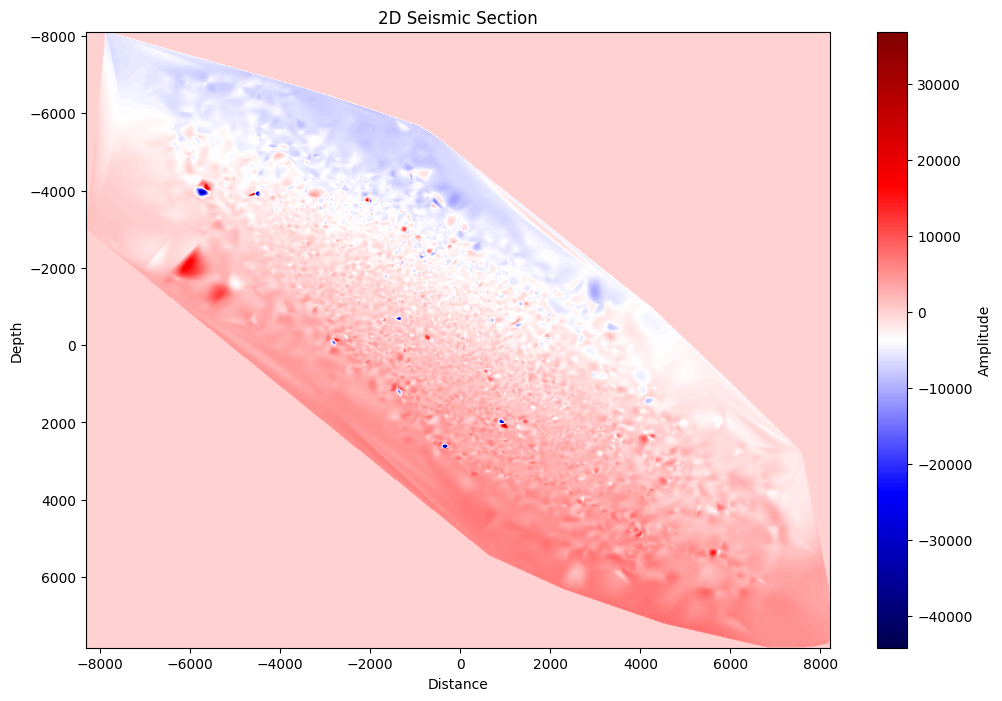

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Load the data
file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project4/NRCAN_Laurentian_Basin/Export/Dip-steeredMedianFiltered_Seismic/output.csv'
df = pd.read_csv(file_path)

# Rename columns for convenience
df.columns = ['Distance', 'Depth', 'Amplitude']

# Define the grid size with higher resolution
grid_x, grid_y = np.mgrid[df['Distance'].min():df['Distance'].max():1000j,
                          df['Depth'].min():df['Depth'].max():1000j]

# Interpolate the amplitude data using cubic interpolation for smoother transitions
grid_z = griddata((df['Distance'], df['Depth']), df['Amplitude'], (grid_x, grid_y), method='cubic')

# Handle NaNs if necessary (e.g., replace them with zeros or perform further interpolation)
grid_z = np.nan_to_num(grid_z)

# Plot the data
plt.figure(figsize=(12, 8))
plt.imshow(grid_z.T, extent=(df['Distance'].min(), df['Distance'].max(), df['Depth'].min(), df['Depth'].max()),
           origin='lower', cmap='seismic', aspect='auto')
plt.colorbar(label='Amplitude')
plt.title('2D Seismic Section')
plt.xlabel('Distance')
plt.ylabel('Depth')
plt.gca().invert_yaxis()  # Invert the y-axis to have depth increasing downwards
plt.show()


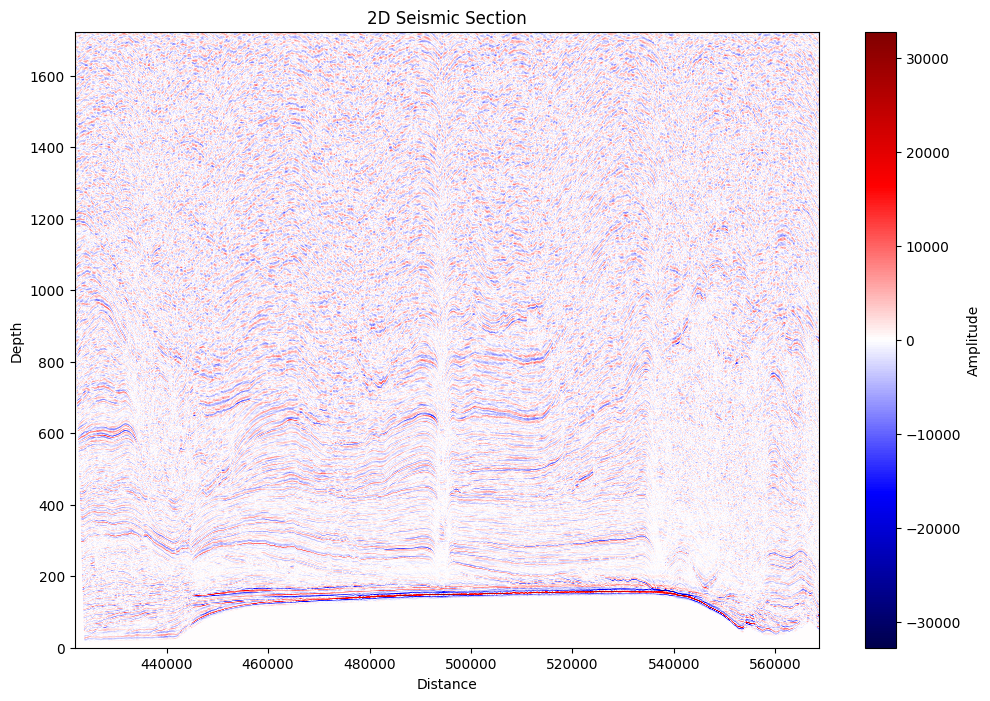

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project4/NRCAN_Laurentian_Basin/Export/Seis/output.csv'
data = pd.read_csv(file_path, header=None)

# Extract distance and amplitude values
distances = data.iloc[:, 0]
amplitudes = data.iloc[:, 3:].values

# Create a 2D grid
depths = np.arange(amplitudes.shape[1])

# Plot the data
plt.figure(figsize=(12, 8))
plt.imshow(amplitudes.T, aspect='auto', extent=[distances.min(), distances.max(), depths.max(), depths.min()],
           cmap='seismic')
plt.colorbar(label='Amplitude')
plt.title('2D Seismic Section')
plt.xlabel('Distance')
plt.ylabel('Depth')
plt.gca().invert_yaxis()  # Invert the y-axis to have depth increasing downwards
plt.show()


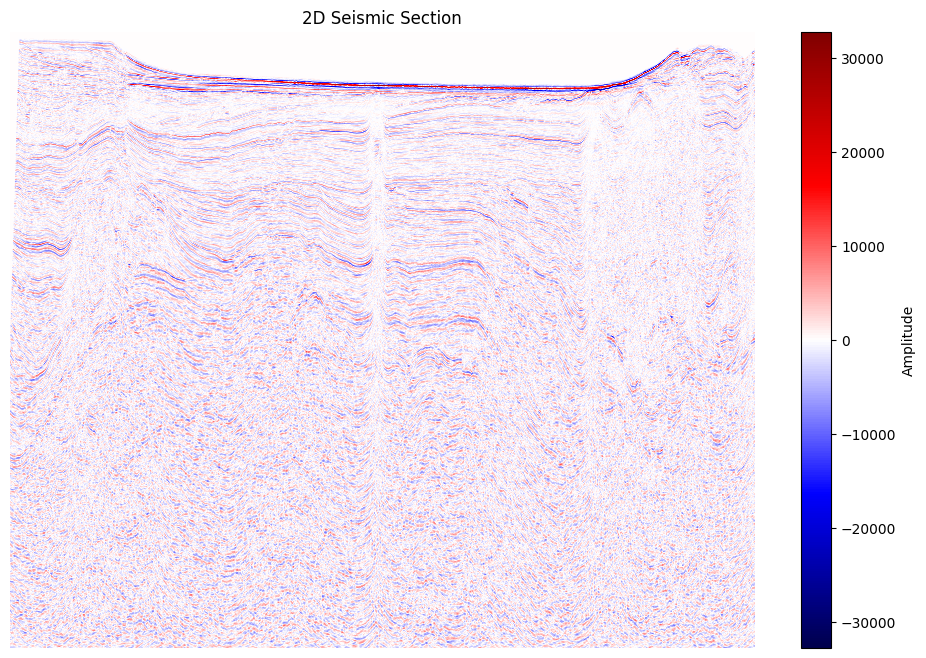

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project4/NRCAN_Laurentian_Basin/Export/Seis/output.csv'
data = pd.read_csv(file_path, header=None)

distances = data.iloc[:, 0]
amplitudes = data.iloc[:, 3:].values 
depths = np.arange(amplitudes.shape[1])

amplitudes_rotated = np.rot90(amplitudes)

plt.figure(figsize=(12, 8))
plt.imshow(amplitudes_rotated, aspect='auto', cmap='seismic', extent=[depths.min(), depths.max(), distances.min(), distances.max()], vmin=-np.max(amplitudes), vmax=np.max(amplitudes))
plt.colorbar(label='Amplitude')
plt.title('2D Seismic Section')
plt.xlabel('Depth')
plt.ylabel('Distance')
plt.gca().invert_yaxis()  
plt.axis('off') 
plt.show()

In [44]:
import lightningchart as lc
import pandas as pd
import numpy as np

# Read the license key from a file
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Load the data
file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project4/NRCAN_Laurentian_Basin/Export/Seis/output.csv'
data = pd.read_csv(file_path, header=None)

# Extract distance and amplitude values
distances = data.iloc[:, 0]
amplitudes = data.iloc[:, 3:].values  # Assuming amplitude data starts from the fourth column

# Create a 2D grid
depths = np.arange(amplitudes.shape[1])

# Rotate the image by 90 degrees
amplitudes_rotated = np.rot90(amplitudes)

# Initialize LightningChart
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Create a chart
chart = lc.ChartXY(
    theme=lc.Themes.Dark,
    title='2D Seismic Section'
)

# Create a heatmap series
heatmap_series = chart.add_heatmap_grid_series(columns=amplitudes_rotated.shape[1], rows=amplitudes_rotated.shape[0])

# Set the intensity values for the heatmap
heatmap_series.invalidate_intensity_values(amplitudes_rotated.tolist())

# Customize the heatmap color palette
heatmap_series.set_palette_colors(
    steps=[
        {'value': 0.0, 'color': lc.Color('blue')},
        {'value': 0.5, 'color': lc.Color('yellow')},
        {'value': 1.0, 'color': lc.Color('red')},
    ],
    look_up_property='value',
    percentage_values=True
)

# Customize axes titles
chart.get_default_x_axis().set_title('Depth')
chart.get_default_y_axis().set_title('Distance')

# Customize the heatmap grid
heatmap_series.set_step(x=1, y=1)
heatmap_series.hide_wireframe()
heatmap_series.set_intensity_interpolation(False)

# Show the chart
chart.open()

127.0.0.1 - - [03/Jul/2024 13:52:57] "GET / HTTP/1.1" 200 -
